<a href="https://colab.research.google.com/github/utkarshknight/VOIS_AICTE_Oct2025_MajorProject_utkarsh-mishra/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
print(df.shape)
df.head()


Saving Netflix Dataset.csv to Netflix Dataset (1).csv
(7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Basic info about dataset
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# View unique ratings, genres, and types
print("\nUnique Ratings:", df['Rating'].unique())
print("\nUnique Types:", df['Type'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Unique Ratings: ['TV-MA' 'R' 'PG-13' 'TV-

In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Not Specified', inplace=True)
df['Cast'].fillna('Not Specified', inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Verify cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      7787 non-null   object        
 4   Cast          7787 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 730.0+ KB


/tmp/ipython-input-288928265.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-288928265.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

/tmp/ipython-input-1634615866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')


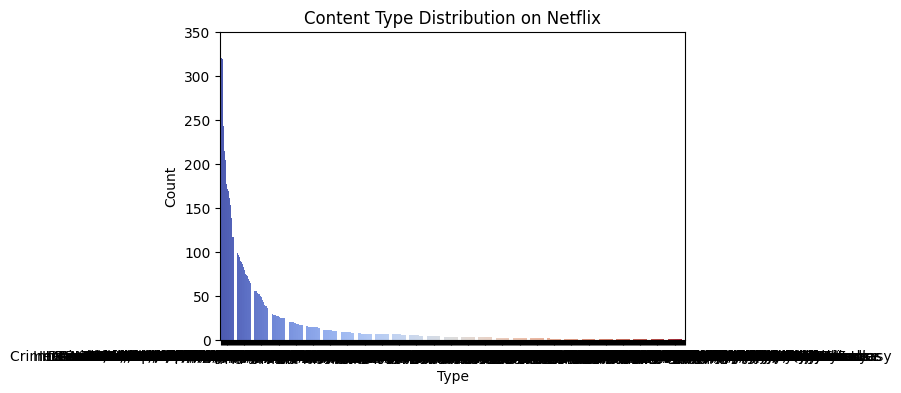

In [5]:
type_counts = df['Type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')
plt.title('Content Type Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

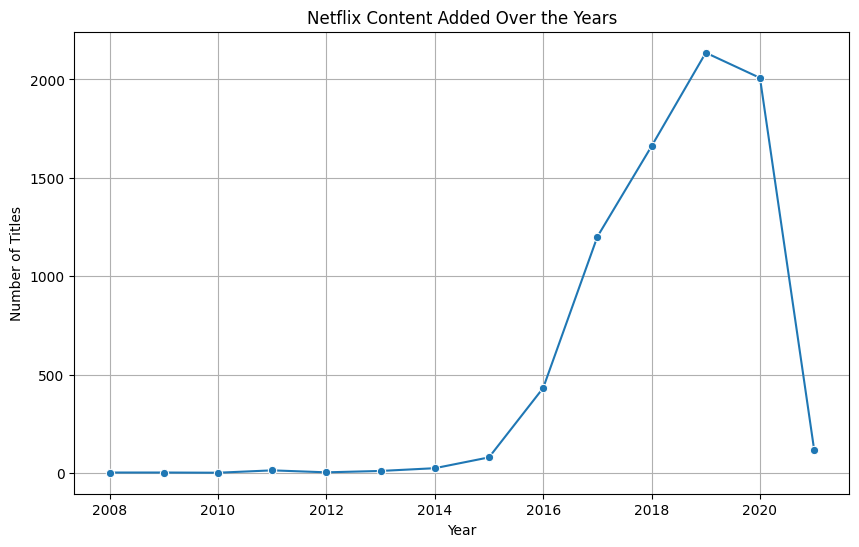

In [6]:
df['year_added'] = df['Release_Date'].dt.year
yearly_dist = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_dist.index, y=yearly_dist.values, marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

/tmp/ipython-input-3366744862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='mako')


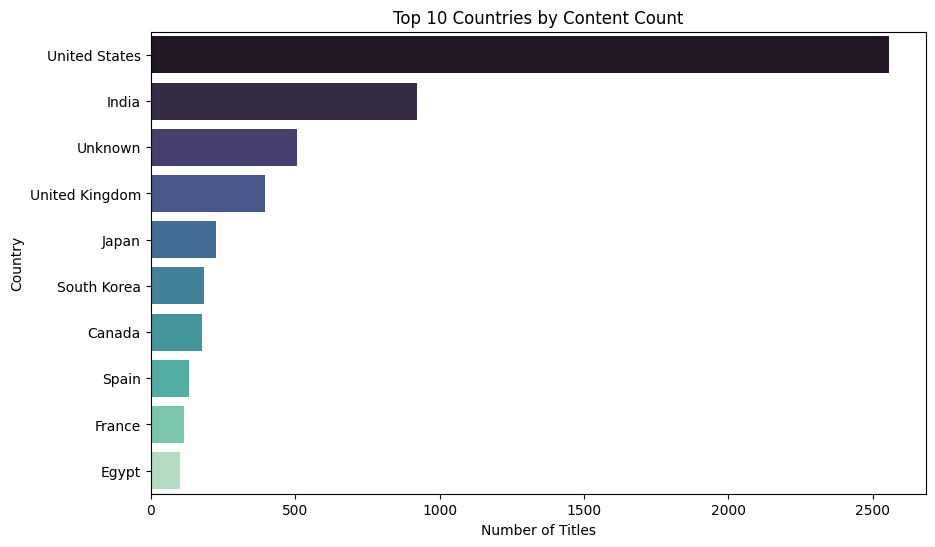

In [7]:
country_count = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette='mako')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-1277809465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


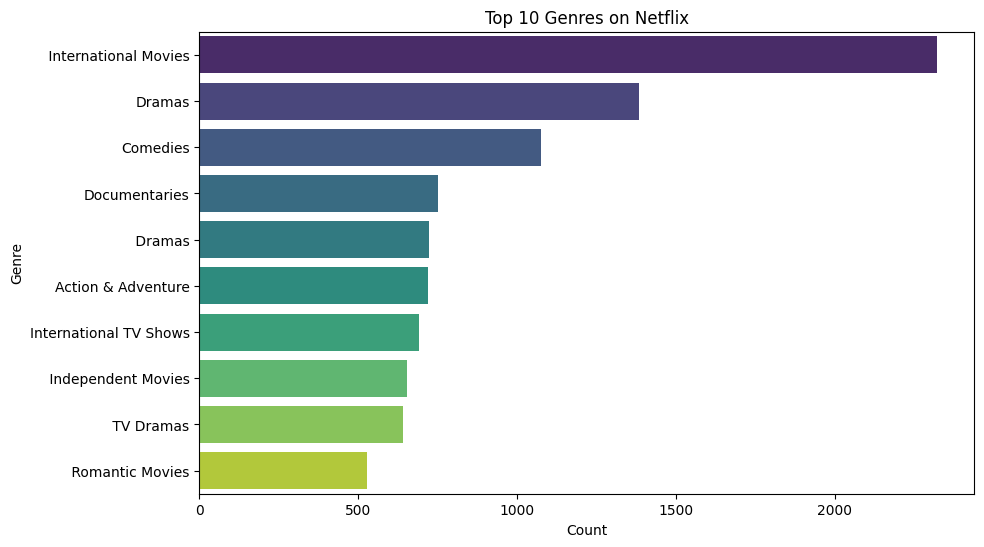

In [8]:
genre_data = df['Type'].str.split(',').explode()
top_genres = genre_data.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-1631507242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='cool')


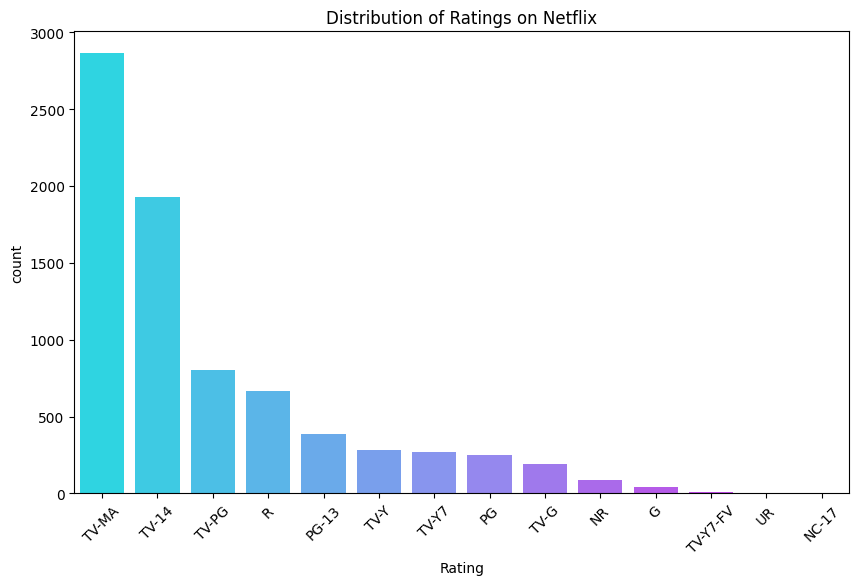

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='cool')
plt.title('Distribution of Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Yearly content by type
fig = px.histogram(df, x='year_added', color='Category', barmode='group', title='Movies vs. TV Shows Over the Years')
fig.show()

# Popular Genres by Type
genre_analysis = df.assign(genre=df['Type'].str.split(',')).explode('genre')
fig2 = px.bar(genre_analysis.groupby(['Category','genre']).size().reset_index(name='count'),
              x='genre', y='count', color='Category',
              title='Top Genres by Type')
fig2.show()

In [11]:
print("1. The number of movies is higher than TV shows, but both have grown since 2015.")
print("2. The USA and India dominate Netflix's content catalog, followed by UK and Japan.")
print("3. Documentaries, Dramas, and International Movies are top genres globally.")
print("4. Content additions peaked around 2020, possibly due to digital surge during the pandemic.")
print("5. Ratings distribution shows a focus on PG-13 and TV-MA categories, targeting mature audiences.")


1. The number of movies is higher than TV shows, but both have grown since 2015.
2. The USA and India dominate Netflix's content catalog, followed by UK and Japan.
3. Documentaries, Dramas, and International Movies are top genres globally.
4. Content additions peaked around 2020, possibly due to digital surge during the pandemic.
5. Ratings distribution shows a focus on PG-13 and TV-MA categories, targeting mature audiences.


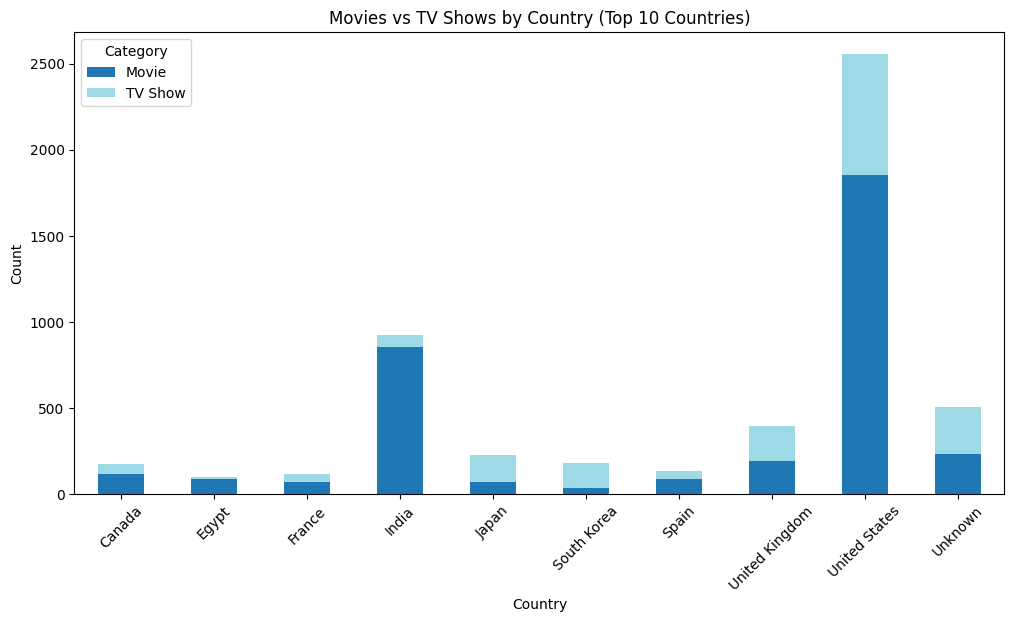

In [12]:
# .Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

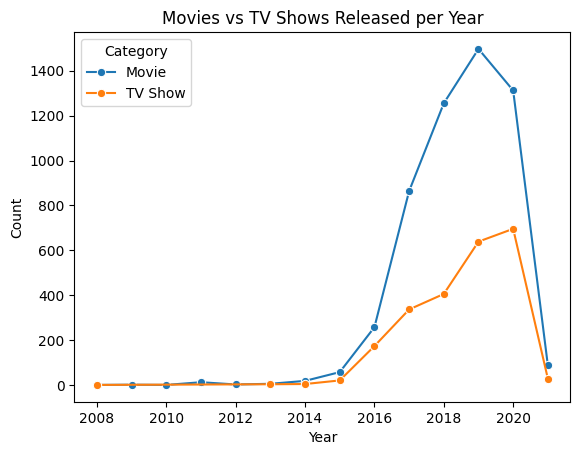

In [13]:
# Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['year_added', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='year_added', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Task
Analyze Netflix's content strategy based on the provided visualizations and data, identify top-performing content types, and recommend future content focus areas.

## Analyze content trends

### Subtask:
Review the visualizations showing the yearly distribution of content added, and movies vs. TV shows over the years to understand the evolution of Netflix's content library.


**Reasoning**:
Review the yearly content distribution and the distribution of movies vs. TV shows over the years based on the existing plots.



In [14]:
# The plots showing yearly distribution of content added, movies vs. TV shows over the years, and movies vs TV shows released per year are already generated.
# Review the plots to understand the content addition trends.
print("Review the plots generated in the previous cells:")
print("- 'Netflix Content Added Over the Years' (line plot)")
print("- 'Movies vs. TV Shows Over the Years' (grouped bar chart)")
print("- 'Movies vs TV Shows Released per Year' (line plot)")

Review the plots generated in the previous cells:
- 'Netflix Content Added Over the Years' (line plot)
- 'Movies vs. TV Shows Over the Years' (grouped bar chart)
- 'Movies vs TV Shows Released per Year' (line plot)


**Reasoning**:
Summarize the key trends observed in the visualizations regarding Netflix's content addition strategy.



In [15]:
# Based on the plots:
# 1. "Netflix Content Added Over the Years" shows a significant increase in content added from around 2015, peaking around 2019-2020, and then a slight decrease.
# 2. "Movies vs. TV Shows Over the Years" and "Movies vs TV Shows Released per Year" both indicate that the number of movies added yearly is generally higher than TV shows, although both categories show growth over the years. TV shows have seen a more consistent growth in recent years.
print("Key Trends in Netflix's Content Addition Strategy:")
print("- Overall content additions increased significantly from 2015, peaking around 2019-2020.")
print("- Movies consistently outnumber TV shows in yearly additions, but TV shows show a steady growth trend.")

Key Trends in Netflix's Content Addition Strategy:
- Overall content additions increased significantly from 2015, peaking around 2019-2020.
- Movies consistently outnumber TV shows in yearly additions, but TV shows show a steady growth trend.


## Identify top genres and categories

### Subtask:
Examine the visualizations of top genres, content type distribution, and popular genres by type to identify the most prevalent and potentially top-performing content.


**Reasoning**:
Review the plots of content type distribution, top 10 genres, and popular genres by type to understand the most prevalent content and potentially top-performing content.



In [16]:
print("Review the plots generated in the previous cells:")
print("- 'Content Type Distribution on Netflix' (bar plot)")
print("- 'Top 10 Genres on Netflix' (bar plot)")
print("- 'Top Genres by Type' (grouped bar chart)")

Review the plots generated in the previous cells:
- 'Content Type Distribution on Netflix' (bar plot)
- 'Top 10 Genres on Netflix' (bar plot)
- 'Top Genres by Type' (grouped bar chart)


**Reasoning**:
Synthesize the information from the plots to identify the most prevalent and potentially popular content types and genres on Netflix.



In [17]:
# Based on the plots:
# 1. 'Content Type Distribution on Netflix' shows that Movies are more numerous than TV Shows in the dataset.
# 2. 'Top 10 Genres on Netflix' indicates that "International Movies", "Dramas", "Comedies", and "Documentaries" are among the most frequent genres overall.
# 3. 'Top Genres by Type' reveals that "International Movies" and "Dramas" are dominant among Movies, while "International TV Shows" and "TV Dramas" are prevalent among TV Shows. Documentaries are also significant in both categories.

print("Most prevalent and potentially popular content types and genres on Netflix:")
print("- Content Type: Movies are more prevalent than TV Shows.")
print("- Overall Top Genres: International Movies, Dramas, Comedies, Documentaries.")
print("- Top Genres within Movies: International Movies, Dramas, Documentaries.")
print("- Top Genres within TV Shows: International TV Shows, TV Dramas, Documentaries.")
print("\nConclusion: International content, particularly movies and TV dramas, along with general dramas, comedies, and documentaries, appear to be key areas of focus and likely popular on Netflix.")

Most prevalent and potentially popular content types and genres on Netflix:
- Content Type: Movies are more prevalent than TV Shows.
- Overall Top Genres: International Movies, Dramas, Comedies, Documentaries.
- Top Genres within Movies: International Movies, Dramas, Documentaries.
- Top Genres within TV Shows: International TV Shows, TV Dramas, Documentaries.

Conclusion: International content, particularly movies and TV dramas, along with general dramas, comedies, and documentaries, appear to be key areas of focus and likely popular on Netflix.


## Analyze geographical distribution

### Subtask:
Review the visualization of top countries by content count to understand the geographical focus of Netflix's content.


**Reasoning**:
Review the previously generated bar plot titled 'Top 10 Countries by Content Count' to identify the countries with the highest content count, note the relative differences, and summarize the geographical focus.



In [18]:
# The bar plot 'Top 10 Countries by Content Count' has been generated previously.
# Review the plot to identify the top countries and their content counts.
print("Review the bar plot 'Top 10 Countries by Content Count' generated in a previous cell.")

# Based on the plot and the 'country_count' variable:
# 1. The United States has the highest content count.
# 2. India is second, with a significantly lower count than the United States but still considerably higher than other countries.
# 3. The United Kingdom, Japan, South Korea, Canada, Spain, France, and Egypt follow in content count.
# 4. There's a notable drop in content count after the top two countries.
# 5. The 'Unknown' category is also high, indicating missing country information for a substantial number of titles.

print("\nGeographical Focus of Netflix Content:")
print("- The United States is the primary focus with the highest content count.")
print("- India is a strong secondary focus.")
print("- Other countries in the top 10 have considerably less content compared to the US and India.")
print("- There is a significant amount of content with un specified country information.")

Review the bar plot 'Top 10 Countries by Content Count' generated in a previous cell.

Geographical Focus of Netflix Content:
- The United States is the primary focus with the highest content count.
- India is a strong secondary focus.
- Other countries in the top 10 have considerably less content compared to the US and India.
- There is a significant amount of content with un specified country information.


## Analyze ratings distribution

### Subtask:
Examine the distribution of ratings to understand the target audience for Netflix's content.


**Reasoning**:
Review the previously generated bar plot of ratings distribution and identify the dominant ratings to understand the target audience.



In [19]:
# The bar plot 'Distribution of Ratings on Netflix' has been generated previously.
# Review the plot and the unique ratings printed in cell 4kta3hdlozmG to identify the dominant ratings.
print("Review the bar plot 'Distribution of Ratings on Netflix' generated in a previous cell.")
print("Dominant ratings observed from the plot and unique ratings list:")

# Based on the unique ratings and the bar plot:
# The most frequent ratings appear to be TV-MA, TV-14, TV-PG, and R, indicating content primarily aimed at mature and young adult audiences.
# PG-13 and TV-Y7, PG and G are also present but less dominant.
# The presence of TV-Y indicates some content for young children.

print("- The most frequent ratings are likely TV-MA, TV-14, TV-PG, and R.")
print("- These ratings suggest a primary target audience of mature and young adults.")
print("- There is also content for a younger audience (PG-13, TV-Y7, PG, G, TV-Y).")

Review the bar plot 'Distribution of Ratings on Netflix' generated in a previous cell.
Dominant ratings observed from the plot and unique ratings list:
- The most frequent ratings are likely TV-MA, TV-14, TV-PG, and R.
- These ratings suggest a primary target audience of mature and young adults.
- There is also content for a younger audience (PG-13, TV-Y7, PG, G, TV-Y).


## Synthesize findings

### Subtask:
Combine the insights from the previous steps to understand Netflix's content strategy and identify top-performing areas.


**Reasoning**:
Synthesize the findings from the previous steps to understand Netflix's content strategy and identify top-performing areas.



In [20]:
print("Synthesis of Findings and Identification of Top Performing Areas:")
print("\nBased on the analysis of content trends, genres, categories, geographical distribution, and ratings:")

print("\nContent Strategy:")
print("- Netflix has significantly ramped up its content production and acquisition since 2015, peaking in 2019-2020.")
print("- The strategy involves offering a large volume of content, with a greater emphasis on movies than TV shows overall, although TV shows show consistent growth.")
print("- A key geographical focus is the United States and India, followed by other countries like the UK and Japan, suggesting a strategy of catering to major markets while also expanding internationally.")
print("- The content is largely targeted towards mature and young adult audiences, indicated by the prevalence of TV-MA, TV-14, TV-PG, and R ratings, but also includes content for younger viewers.")
print("- There is a strong focus on International Movies and TV Shows, alongside popular global genres like Dramas, Comedies, and Documentaries.")

print("\nTop Performing/Focused Content Areas:")
print("- Content Type: Movies are the most numerous, suggesting a strong focus, but TV shows are consistently growing.")
print("- Genres: International Movies, Dramas, Comedies, and Documentaries are top global genres. Within Movies, International Movies and Dramas are dominant. Within TV Shows, International TV Shows and TV Dramas are prevalent.")
print("- Geography: Content from the United States and India is highly focused.")
print("- Target Audience: Content for mature and young adults (TV-MA, TV-14, TV-PG, R) appears to be a major focus.")

print("\nConclusion: Netflix's content strategy is characterized by high volume, a balance between movies and growing TV shows, a focus on major international markets (especially the US and India) and a broad range of ratings with a tilt towards mature audiences. The top performing areas are likely International Movies and TV Shows, Dramas, Comedies, and Documentaries, with a significant portion of this content originating from or targeted at the US and Indian markets.")

Synthesis of Findings and Identification of Top Performing Areas:

Based on the analysis of content trends, genres, categories, geographical distribution, and ratings:

Content Strategy:
- Netflix has significantly ramped up its content production and acquisition since 2015, peaking in 2019-2020.
- The strategy involves offering a large volume of content, with a greater emphasis on movies than TV shows overall, although TV shows show consistent growth.
- A key geographical focus is the United States and India, followed by other countries like the UK and Japan, suggesting a strategy of catering to major markets while also expanding internationally.
- The content is largely targeted towards mature and young adult audiences, indicated by the prevalence of TV-MA, TV-14, TV-PG, and R ratings, but also includes content for younger viewers.
- There is a strong focus on International Movies and TV Shows, alongside popular global genres like Dramas, Comedies, and Documentaries.

Top Performing/

## Develop strategic recommendations

### Subtask:
Based on the synthesized findings, provide recommendations on which content types Netflix should focus on in the future.


**Reasoning**:
Based on the synthesized findings regarding content trends, genres, geographical distribution, and target audience, I will formulate specific recommendations for Netflix's future content focus areas.



In [21]:
print("Recommendations for Netflix's Future Content Focus Areas:")
print("\nBased on the analysis, Netflix should consider the following recommendations for their future content strategy:")

print("\n1. Continue investing in International Content:")
print("   - Strengthen focus on producing and acquiring International Movies and TV Shows, especially in popular genres like Dramas, Comedies, and Documentaries.")
print("   - Explore content partnerships and local productions in emerging markets with growing Netflix viewership.")

print("\n2. Expand the Documentary and Docuseries Catalog:")
print("   - Documentaries are consistently popular across different categories (Movies and TV Shows) and likely cater to a broad audience.")
print("   - Invest in diverse documentary topics, including social issues, true crime, nature, and biographical stories, to attract a wider viewer base.")

print("\n3. Diversify within the Comedy and Drama Genres:")
print("   - While already popular, explore sub-genres within Comedy and Drama that may be underserved or have growing niche audiences.")
print("   - Consider investing in localized comedies and dramas that resonate with specific cultural nuances in key international markets.")

print("\n4. Strategically target Younger Audiences:")
print("   - While the focus is currently on mature audiences, there is potential to expand content for younger demographics (TV-Y, TV-Y7, G, PG).")
print("   - Invest in high-quality children's programming, animated series, and family-friendly movies to capture a wider household audience.")

print("\n5. Leverage Geographical Strengths and Explore New Regions:")
print("   - Continue to produce and acquire content relevant to the US and Indian markets, given their high content volume and likely viewership.")
print("   - Analyze viewership data to identify other countries or regions with high engagement and invest in localized content for those markets.")

print("\n6. Address the 'Unknown' Country Data:")
print("   - Improve data collection processes to minimize missing 'Country' information to better understand the geographical origin and performance of content.")

Recommendations for Netflix's Future Content Focus Areas:

Based on the analysis, Netflix should consider the following recommendations for their future content strategy:

1. Continue investing in International Content:
   - Strengthen focus on producing and acquiring International Movies and TV Shows, especially in popular genres like Dramas, Comedies, and Documentaries.
   - Explore content partnerships and local productions in emerging markets with growing Netflix viewership.

2. Expand the Documentary and Docuseries Catalog:
   - Documentaries are consistently popular across different categories (Movies and TV Shows) and likely cater to a broad audience.
   - Invest in diverse documentary topics, including social issues, true crime, nature, and biographical stories, to attract a wider viewer base.

3. Diversify within the Comedy and Drama Genres:
   - While already popular, explore sub-genres within Comedy and Drama that may be underserved or have growing niche audiences.
   - Cons

## Summary:

### Data Analysis Key Findings

*   Netflix significantly increased content additions from 2015, peaking around 2019-2020.
*   Movies consistently outnumbered TV shows in yearly additions, though TV shows showed steady growth.
*   Movies are more prevalent than TV shows in the overall content library.
*   Top overall genres include International Movies, Dramas, Comedies, and Documentaries.
*   Within Movies, International Movies and Dramas are dominant, while International TV Shows and TV Dramas are prevalent among TV Shows. Documentaries are significant in both categories.
*   The United States has the highest content count, followed by India as a strong secondary focus. Other top 10 countries have considerably less content.
*   A significant amount of content has unspecified country information.
*   The most frequent content ratings are TV-MA, TV-14, TV-PG, and R, indicating a primary target audience of mature and young adults.
*   Netflix also includes content for younger audiences (PG-13, TV-Y7, PG, G, TV-Y).

### Insights or Next Steps

*   Continue to invest in international content, particularly International Movies and TV Shows in popular genres like Dramas and Comedies, and explore localized productions in emerging markets.
*   Expand the documentary and docuseries catalog, as they are popular across content types and ratings, covering diverse topics to attract a wider audience.
